In [1]:
import pandas as pd
from pathlib import Path as PPath

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import plotly.graph_objects as go

In [4]:
import ast

In [5]:
import re

In [6]:
PATH = './experiments/'

In [7]:
#%matplotlib inline

In [8]:
%matplotlib notebook

# Functions

In [ ]:
test_str  = '[704.7250945293949, 0, 0.0, 0.0, 30, 5.522710477581892]'
function(test_str)

In [10]:
def function(x):
    x = ast.literal_eval(x)
    
    if x[1] > 0: # Hit obstacle (fit_obs) (max 1 hit)
        return 'infeasible'
    
    elif x[0] > 2: # Away from destination wp (fit_d) (max 2 meters)
        return 'verify'
    
    else:
        return 'feasible'

In [ ]:
pathlist = PPath(PATH).glob("**/mode_A*_exec_1_*.csv")

for i, p in enumerate(pathlist):
    print(p)
    
print('Qty: ', i+1)

In [ ]:
pathlist = PPath(PATH).glob("**/mode_G*_exec_1_*.csv")

quantity_feasibility = []

for path in pathlist:
    df = pd.read_csv(path)
    
    df['label'] = df['fitness_trace'].apply(lambda x: function(x))
    
    quantity_feasibility.append({
        'qty_infeasible': df.loc[df['label']=='infeasible'].shape[0],
        'qty_verify': df.loc[df['label']=='verify'].shape[0],
        'qty_feasible': df.loc[df['label']=='feasible'].shape[0],
        'best': df[df.fitness == df.fitness.min()].iloc[0]['label']
    })


In [ ]:
quantity_feasibility_df = pd.DataFrame(quantity_feasibility)
ax = quantity_feasibility_df.plot(figsize=(15,8))
ax.legend(['infeasible', 'verify', 'feasible'])
ax.set_xlabel('Map number')
ax.set_ylabel('Quantity of Routes')
ax.plot()
# mode__exec_1_category_routes

In [ ]:
plt.figure()
# color=['C2','C0','C1']
ax = quantity_feasibility_df['best'].value_counts().plot.barh(figsize=(10,5), color=['C2','C1','C0'])
ax.set_xlabel('Quantity of Maps')
ax.set_ylabel('Category')
# # mode__exec_1_category_maps

In [ ]:
quantity_feasibility_df

# Experiments

In [ ]:
# pathlist = PPath(MAPS_PATH).glob("**/*.sgl")

In [ ]:
df = pd.read_csv(PATH + 'mode_R-PC_map_06_exec_1_history.csv')
df.sample(20)

In [ ]:
%matplotlib notebook
plt.plot(df['birth_time'], df['fitness'])

In [ ]:
def plot(df):
    fig = go.Figure()
    for column in df.columns:
        fig.add_trace(go.Scatter(x=df.index, y=df[column], name=column))
    fig.show()

In [ ]:
df_1 = df.groupby(['generation']).agg({'fitness': [np.min, np.mean]})
df_1.columns = df_1.columns.get_level_values(1)
plot(df_1)

In [ ]:
df_1

In [ ]:
# Gerar df de bests

ancestry = []

melhor = df.iloc[0]['fitness']
for i in range(df.shape[0]):
    if df.iloc[i]['fitness'] < melhor:
        melhor = df.iloc[i]['fitness']
        ancestry.append([df.iloc[i]['birth_time'], df.iloc[i]['generation'], melhor])

In [ ]:
df_ancestry = pd.DataFrame(ancestry, columns=['birth_time', 'generation', 'fitness'])

In [ ]:
df_ancestry

In [ ]:
plot(df_ancestry)

In [ ]:
plt.plot(df_ancestry['generation'], df_ancestry['fitness'])
plt.plot(df_1['mean'])

In [ ]:
df['fitness_trace'][0]

In [ ]:
ast.literal_eval(df['fitness_trace'])

In [ ]:
def function(x):
    x = ast.literal_eval(x)
    
    if x[1] > 4000:
        return 'infeasible'
    
    elif x[0] > 500:
        return 'verify'
    
    else:
        return 'feasible'

In [ ]:
df['label'] = df['fitness_trace'].apply(lambda x: function(x))

In [ ]:
{
    'qty_infeasible': df.loc[df['label']=='infeasible'].shape[0],
    'qty_verify': df.loc[df['label']=='verify'].shape[0],
    'qty_feasible': df.loc[df['label']=='feasible'].shape[0]
}

In [ ]:
df[df.fitness == df.fitness.min()].iloc[0]['label']

# Experiments

In [130]:
pathlist = PPath(PATH).glob("**/mode_EMA*_exec_1_*.csv")
dfs = []
map_numbers = []
for i, path in enumerate(pathlist):
    print(path)
    m = re.search(r'(_map_\d*_)',str(path))
    if m:
        found = m.group(1)
    number = re.sub(r"[A-Za-z/\-_\.]", "", found) 
    map_numbers.append(number)
    
    df = pd.read_csv(path)
    df = df[df['birth_time']<=180] #trim
    df['label'] = df['fitness_trace'].apply(lambda x: function(x))
    
    df_feasible = pd.DataFrame(df[df['label']=='feasible'])
    df_feasible['label_count_cumulative'] = 1
    df_feasible['label_count_cumulative'] = df_feasible['label_count_cumulative'].cumsum()
    
    dfs.append(df_feasible)
    
    #if i == 5:
     #   break

experiments/mode_C/map_30/mode_C_map_30_exec_1_history.csv
experiments/mode_C/map_29/mode_C_map_29_exec_1_history.csv
experiments/mode_C/map_07/mode_C_map_07_exec_1_history.csv
experiments/mode_C/map_06/mode_C_map_06_exec_1_history.csv
experiments/mode_C/map_36/mode_C_map_36_exec_1_history.csv
experiments/mode_C/map_05/mode_C_map_05_exec_1_history.csv
experiments/mode_C/map_15/mode_C_map_15_exec_1_history.csv
experiments/mode_C/map_00/mode_C_map_00_exec_1_history.csv
experiments/mode_C/map_01/mode_C_map_01_exec_1_history.csv
experiments/mode_C/map_41/mode_C_map_41_exec_1_history.csv
experiments/mode_C/map_03/mode_C_map_03_exec_1_history.csv
experiments/mode_C/map_27/mode_C_map_27_exec_1_history.csv
experiments/mode_C/map_43/mode_C_map_43_exec_1_history.csv
experiments/mode_C/map_40/mode_C_map_40_exec_1_history.csv
experiments/mode_C/map_10/mode_C_map_10_exec_1_history.csv
experiments/mode_C/map_21/mode_C_map_21_exec_1_history.csv
experiments/mode_C/map_14/mode_C_map_14_exec_1_history.c

In [131]:
legends = [f'Map {i}' for i in map_numbers]

In [185]:
dic={}
for df, legend in zip(dfs, legends):
    grouped = df.groupby(df['birth_time'].apply(lambda x: round(x, 2))).count()
    dic[f"{legend}"] = grouped['label_count_cumulative'].cumsum()

    
    
dic = pd.DataFrame(dic)
dic = dic.fillna(method='ffill')



dic['Average'] = dic.mean(axis=1)
dic['Min'] = dic.min(axis=1)
dic['Max'] = dic.max(axis=1)

In [135]:
# plt.figure()
# plt.plot(dic)

<IPython.core.display.Javascript object>


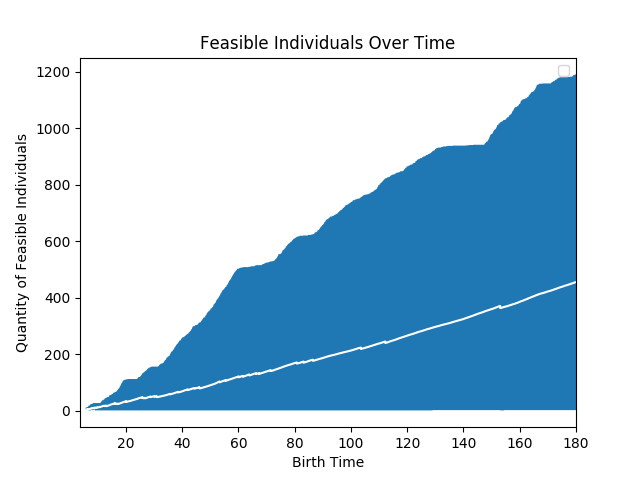

In [137]:
ax = dic.plot(y='Average', c='white', use_index=True)
dic['birth_time'] = dic.index
plt.fill_between(x='birth_time', y1='Min', y2='Max', data=dic)
plt.title(f'Feasible Individuals Over Time')
plt.xlabel('Birth Time')
plt.ylabel('Quantity of Feasible Individuals')
plt.legend([])

In [114]:
# plt.figure()
# for df_feasible in dfs:
#     plt.plot(df_feasible['birth_time'], df_feasible['label_count_cumulative'])

# plt.plot()
# plt.title(f'Feasible Individuals Over Time')
# plt.xlabel('Birth Time')
# plt.ylabel('Quantity of Feasible Individuals')
#plt.legend(legends)

In [ ]:
plt.plot(df['birth_time'], df['label_count_cumulative'])

In [ ]:
df['birth_time']

In [ ]:
df['label_count_cumulative']

# Experiments

In [171]:
pathlist = PPath(PATH).glob("**/mode_EMC*_exec_1_*.csv")
dfs = []
map_numbers = []
for i, path in enumerate(pathlist):
#     print(path)
    m = re.search(r'(_map_\d*_)',str(path))
    if m:
        found = m.group(1)
    number = re.sub(r"[A-Za-z/\-_\.]", "", found) 
    map_numbers.append(number)
    
    df = pd.read_csv(path)
    df = df[df['birth_time']<=180] #trim
    df['label'] = df['fitness_trace'].apply(lambda x: function(x))
    
    df_feasible = pd.DataFrame(df[df['label']=='feasible'])
    df_feasible['label_count_cumulative'] = 1
    df_feasible['label_count_cumulative'] = df_feasible['label_count_cumulative'].cumsum()
    
    dfs.append(df_feasible)
    
    
    if i == 2:
        break

legends = [f'Map {i}' for i in map_numbers]

In [172]:
df = dfs[0]

In [173]:
def get_fitness_trace(x, i):
    x = ast.literal_eval(x)
    return x[i]

# fit_d fit_obs fit_con fit_cur fit_t fit_dist fit_z_bonus
df['fit_d'] = df['fitness_trace'].apply(lambda x: get_fitness_trace(x, 0))
df['fit_obs'] = df['fitness_trace'].apply(lambda x: get_fitness_trace(x, 1))
df['fit_con'] = df['fitness_trace'].apply(lambda x: get_fitness_trace(x, 2))
df['fit_cur'] = df['fitness_trace'].apply(lambda x: get_fitness_trace(x, 3))
df['fit_t'] = df['fitness_trace'].apply(lambda x: get_fitness_trace(x, 4))
df['fit_dist'] = df['fitness_trace'].apply(lambda x: get_fitness_trace(x, 5))
df['fit_z_bonus'] = df['fitness_trace'].apply(lambda x: -get_fitness_trace(x, 6))

In [176]:
df.head()

,id,generation,parents,fitness,fitness_trace,birth_time,route,label,label_count_cumulative,fit_d,fit_obs,fit_con,fit_cur,fit_t,fit_dist,fit_z_bonus
1,1,0,[],485451.224303,"[0, 0, 18.946946737206826, 6.882239889576366, ...",0.001596,"[[0, 0], [0.09870471480564968, 0.0], [0.307417...",feasible,1,0,0,18.946947,6.882240,18,18.360205,48.499457
4,4,0,[],406062.298018,"[0, 0, 33.50496803593619, 11.077585727655254, ...",0.001909,"[[0, 0], [-0.04853945484943001, 0.0], [-0.2637...",feasible,2,0,0,33.504968,11.077586,24,33.217812,40.534325
7,7,0,[],283283.090606,"[0, 0, 5.712787180470426, 1.4593576510185913, ...",0.002069,"[[0, 0], [0.7985101036391054, 0.0], [0.1763742...",feasible,3,0,0,5.712787,1.459358,2,1.506386,28.318986
8,8,0,[],314350.192078,"[0, 0, 16.000894895926724, 7.683025347807761, ...",0.002134,"[[0, 0], [-0.7981713578515572, 0.0], [-1.79453...",feasible,4,0,0,16.000895,7.683025,14,9.827913,31.396352
9,9,0,[],424679.880681,"[0, 0, 19.968215877924244, 7.47271932344375, 1...",0.002193,"[[0, 0], [0.8009844949112244, 0.0], [-0.680293...",feasible,5,0,0,19.968216,7.472719,13,21.188768,42.425428


In [160]:
df['fit_d'].mean()

0.0

In [198]:
dic = {}
grouped = df.groupby(df['birth_time'].apply(lambda x: round(x, 0))).mean()

dic['fitness'] = grouped['fitness']
# dic['fit_d'] = grouped['fit_d']
# dic['fit_z_bonus'] = grouped['fit_z_bonus']

dic = pd.DataFrame(dic)
dic = dic.fillna(method='ffill')

In [199]:
dic

,fitness
birth_time,
0.0,6.490193e+05
1.0,3.437176e+05
2.0,3.456434e+05
3.0,3.284444e+05
4.0,2.553643e+05
5.0,1.967178e+05
6.0,3.254076e+05
7.0,2.675818e+05
8.0,3.165945e+05


<IPython.core.display.Javascript object>


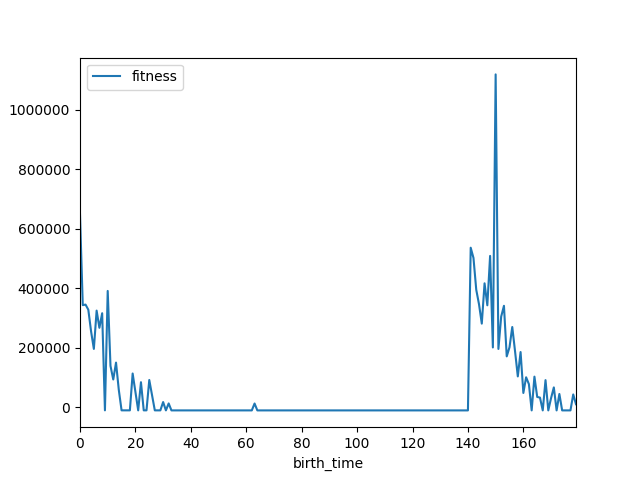

In [200]:
dic.plot()

<IPython.core.display.Javascript object>


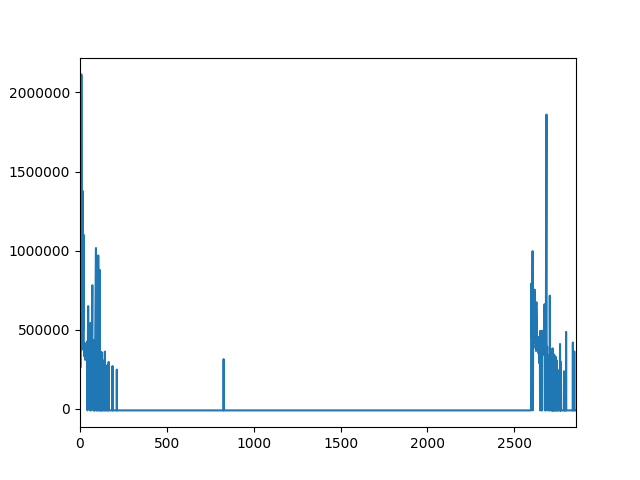

In [201]:
plt.figure()
df['fitness'].plot()

In [164]:
dic={}
for df, legend in zip(dfs, legends):
    grouped = df.groupby(df['birth_time'].apply(lambda x: round(x, 2))).mean()
    print(grouped)
    #dic[f"{legend}"] = grouped['fit_d']
    break

                id  generation        fitness  birth_time  \
birth_time                                                  
0.00         11.25         0.0  377339.795976    0.002296   
0.82         25.00         1.0  292186.292906    0.815218   
0.85         27.00         1.0  276992.781321    0.853741   
0.96         28.00         1.0  384168.005416    0.963556   
1.03         30.00         1.0  205888.740042    1.031195   
...            ...         ...            ...         ...   
170.70      501.00        62.0  113704.303572  170.697791   
171.63      503.00        63.0  134473.033721  171.633187   
172.16      504.00        63.0  260760.058704  172.163876   
173.26      506.00        63.0  212883.559094  173.263519   
174.81      507.00        64.0  138236.553534  174.806747   

            label_count_cumulative  
birth_time                          
0.00                           6.5  
0.82                          13.0  
0.85                          14.0  
0.96                 